<a href="https://colab.research.google.com/github/supertime1/Floyer_Analysis/blob/main/Cosinuss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Set up dependency

In [ ]:
import sys
sys.path.append('C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss')

In [ ]:
from data_container import config, DataFile
from data_container.api_db_sync import DBSync
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pickle
import seaborn as sns
from utils import util
import pingouin as pg
import scipy.stats

2021-03-15 21:43:24 - DEBUG -       dc_config:  46 - DcConfig initialized


#2.Connect to Cosinuss Database

Connect to Cosinuss's database to get the API file handler. **Open redis-server.exe first before running configure_api()** .

In [ ]:
# password: teeshau7aiMonoh9ee in case it is needed
api = util.configure_api(db_name='sonova_analysis', 
                         username='sonova.fremont.api', 
                         prj_hash_id='M9KH',
                         update_local=False)

Generate a statistic table for data analysis



In [ ]:
def create_stats_table(date, api, floyer_device, algo_version, correct_label=False):
    table = util.generate_table(date, api)

    print('Table is generated')

    # Correct the label of 'cShell' and 'Biometric', 
    # in case they were mistakenly entered by Cosinuss
    if correct_label:
        correct_table = util.correct_label(table, api)
        print('Correcting the label')
    else:
        correct_table = table
    # find the row indices of paired floyer-polar device 
    paired_idx_lst = util.find_pairs_row_index(correct_table, floyer_device)
    print('paired device index list is generated')
    # generate a paired sample class by using the paired row indices; 
    # you also need to give the heart rate algorithm version
    paired_sample_lst = util.generate_paired_samples(paired_idx_lst,
                                                     correct_table, 
                                                     algo_version,
                                                     api)
    # generate a stats_table for stats analysis
    stats_table = util.generate_stats_table(paired_sample_lst)
    return util.Stats_Table(stats_table, floyer_device, algo_version)

In [ ]:
st = create_stats_table('2020-12-31', api, 'cshell', 'v0', correct_label=False)

In [ ]:
util.paired_csv(correct_table=correct_table, 
           floyer_device='biometric', 
           api=api,
           file_path='C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss/csv/')

#3. Data Analysis

In [ ]:
with open("C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss/stats.pkl", "rb") as fp:
    stats_table = pickle.load(fp)

In [ ]:
st = util.Stats_Table(stats_table, 'BiometRIC', 'v0')

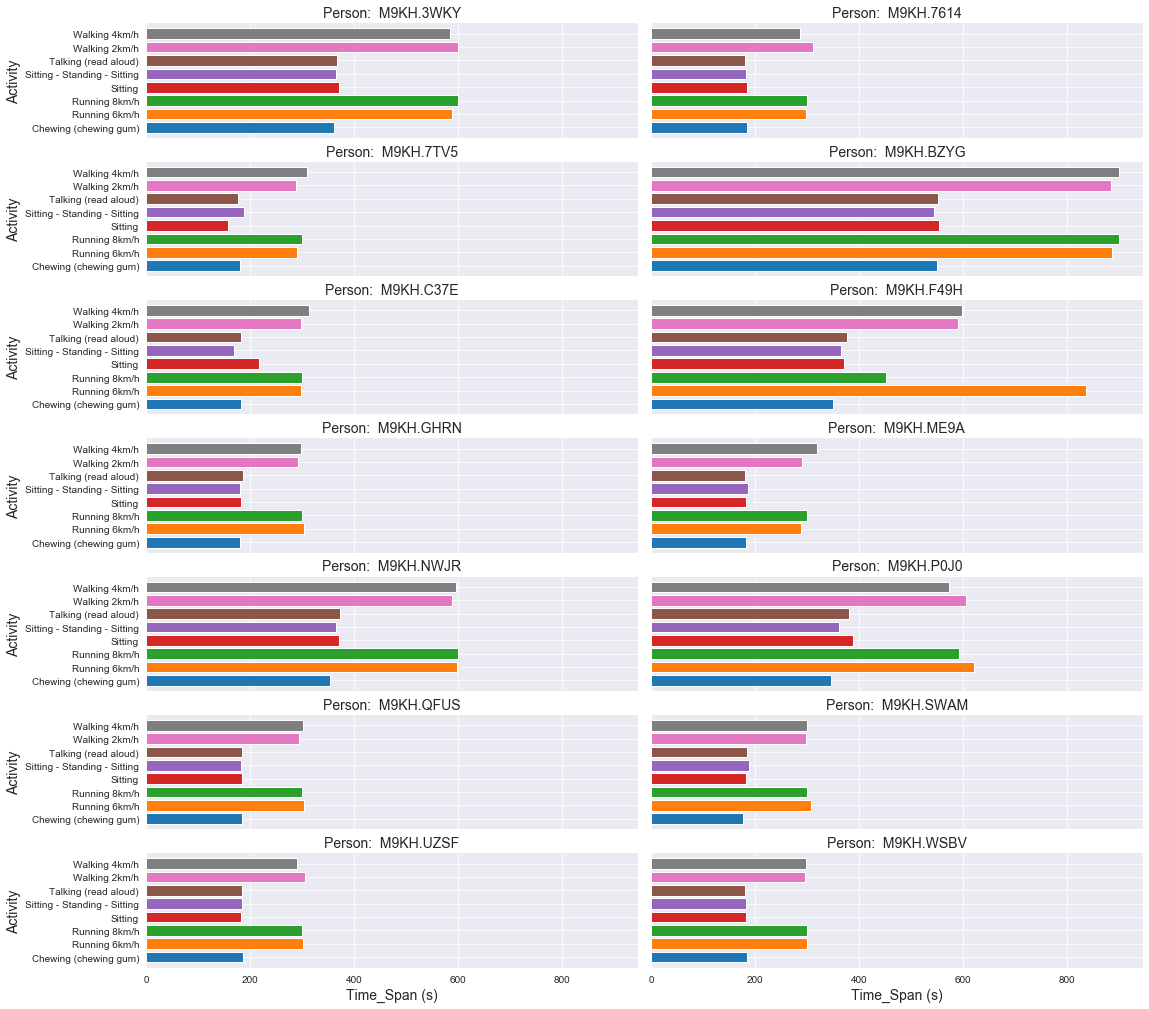

In [ ]:
st.visualize_subjects()

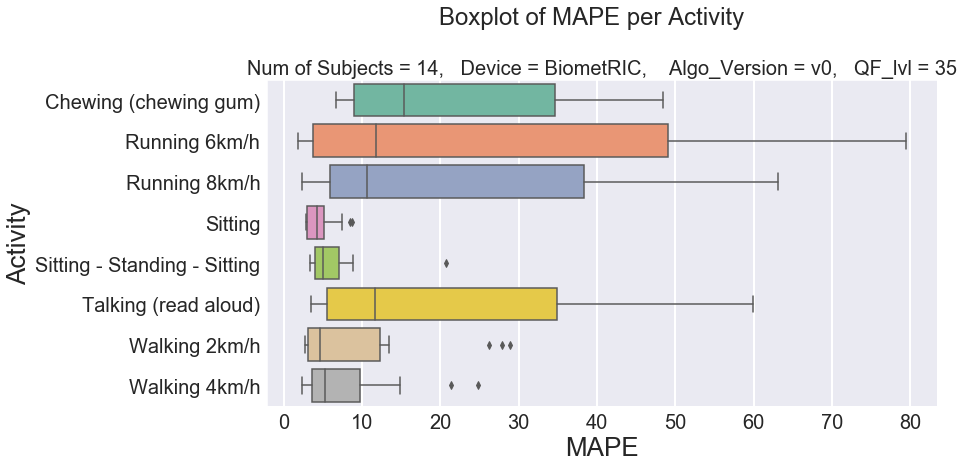

In [ ]:
st.mape_boxplot(35, person_level=False)

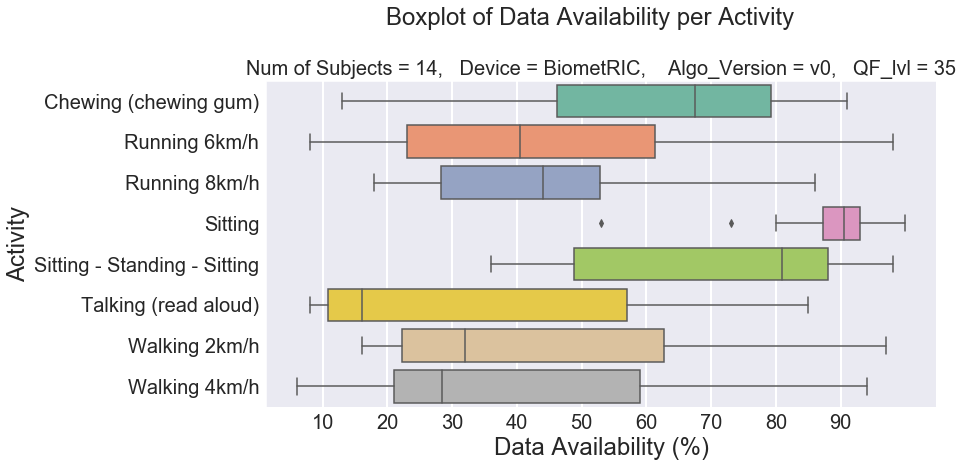

In [ ]:
st.da_boxplot(35, person_level=False)

In [ ]:
st.create_overview_table(35)

,Activity,Floyer hr_mean,Floyer hr_std,Polar hr_mean,Polar hr_std,Pearson Correlation,Mean Difference (Bias),Bias 95% LOA,MAPE,DA (%),ICC
0,Chewing (chewing gum),75,18,75,15,0.12,0,"[43.0, -43.0]",24.65,64.0,0.19
1,Running 6km/h,83,43,113,18,0.03,-30,"[61.0, -121.0]",14.41,46.0,0.14
2,Running 8km/h,112,47,139,20,0.31,-26,"[62.0, -115.0]",15.21,46.0,0.28
3,Sitting,68,16,72,16,0.84,-3,"[15.0, -21.0]",4.58,87.0,0.95
4,Sitting - Standing - Sitting,73,20,82,18,0.28,-9,"[36.0, -54.0]",6.07,72.0,0.52
5,Talking (read aloud),63,18,77,14,0.27,-14,"[25.0, -53.0]",10.38,37.0,0.22
6,Walking 2km/h,72,17,82,15,0.30,-10,"[27.0, -47.0]",8.10,44.0,0.43
7,Walking 4km/h,84,20,92,15,0.66,-7,"[23.0, -37.0]",5.94,44.0,0.76


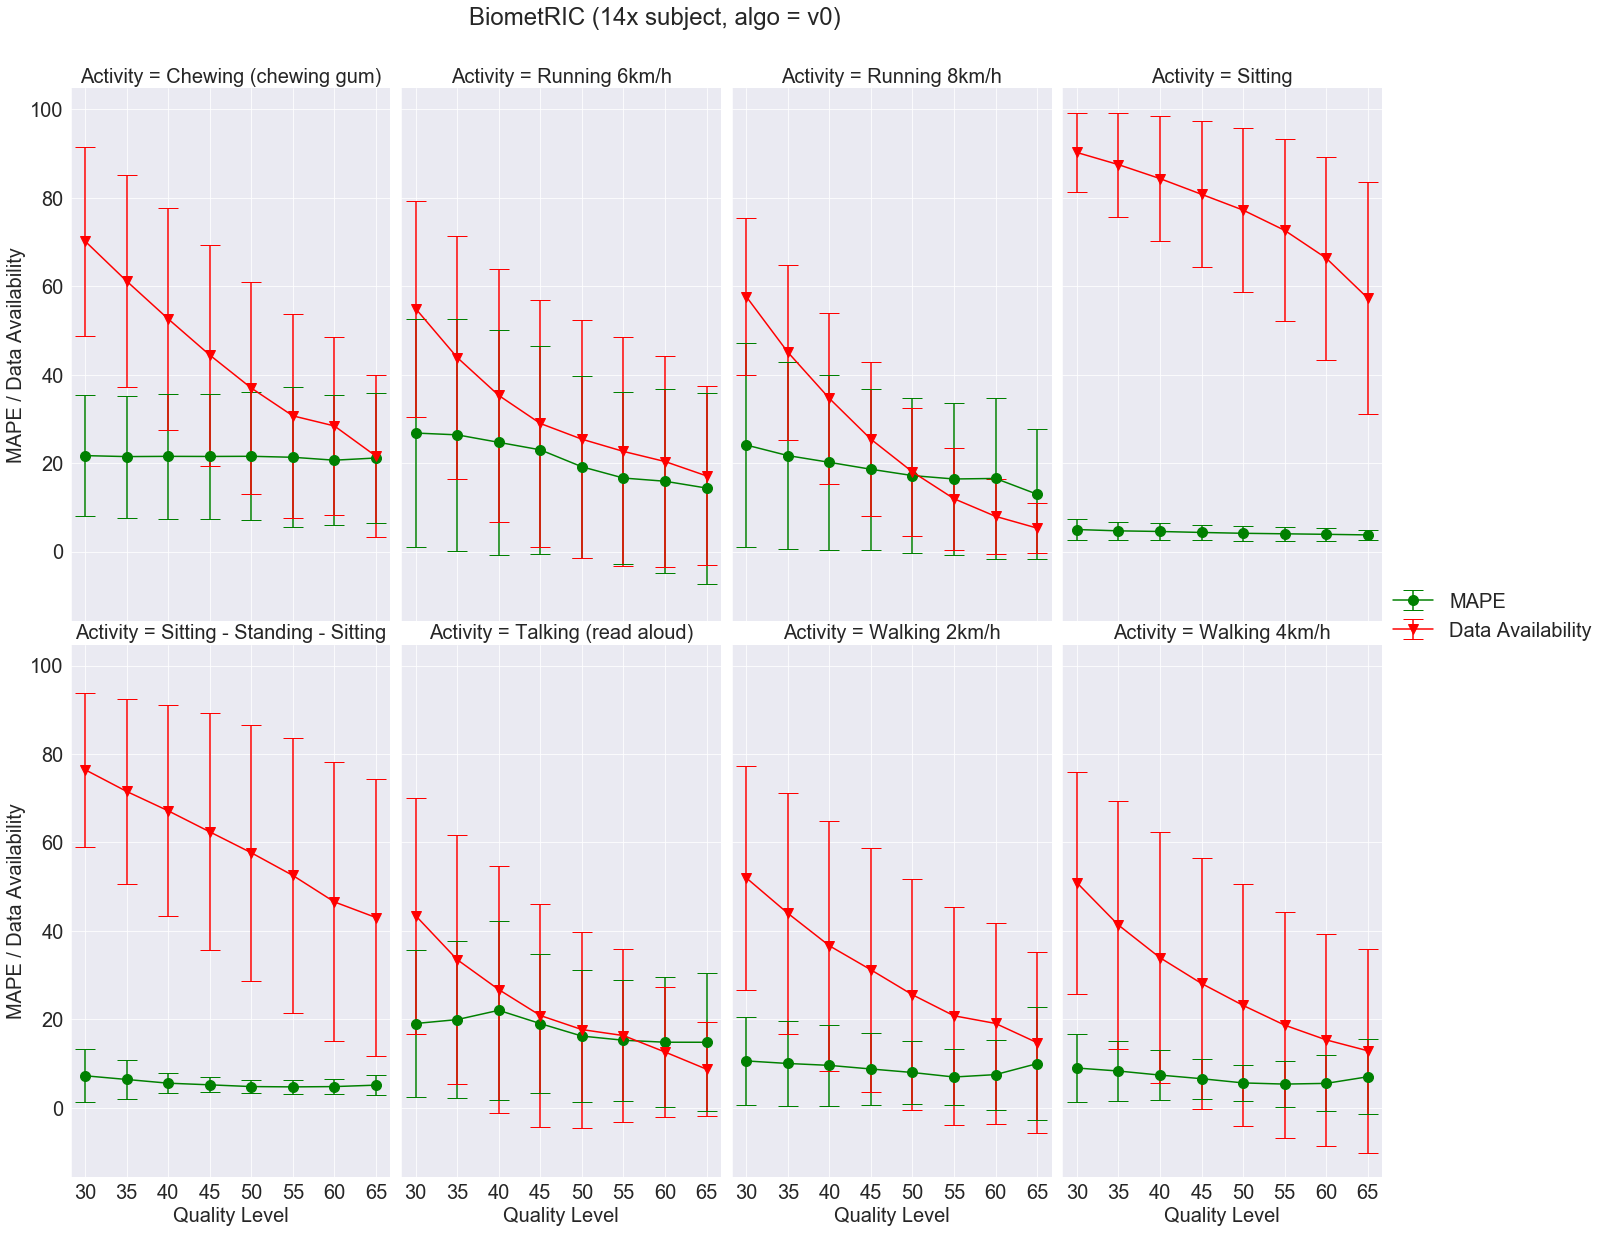

In [ ]:
st.mape_vs_qa()

No handles with labels found to put in legend.


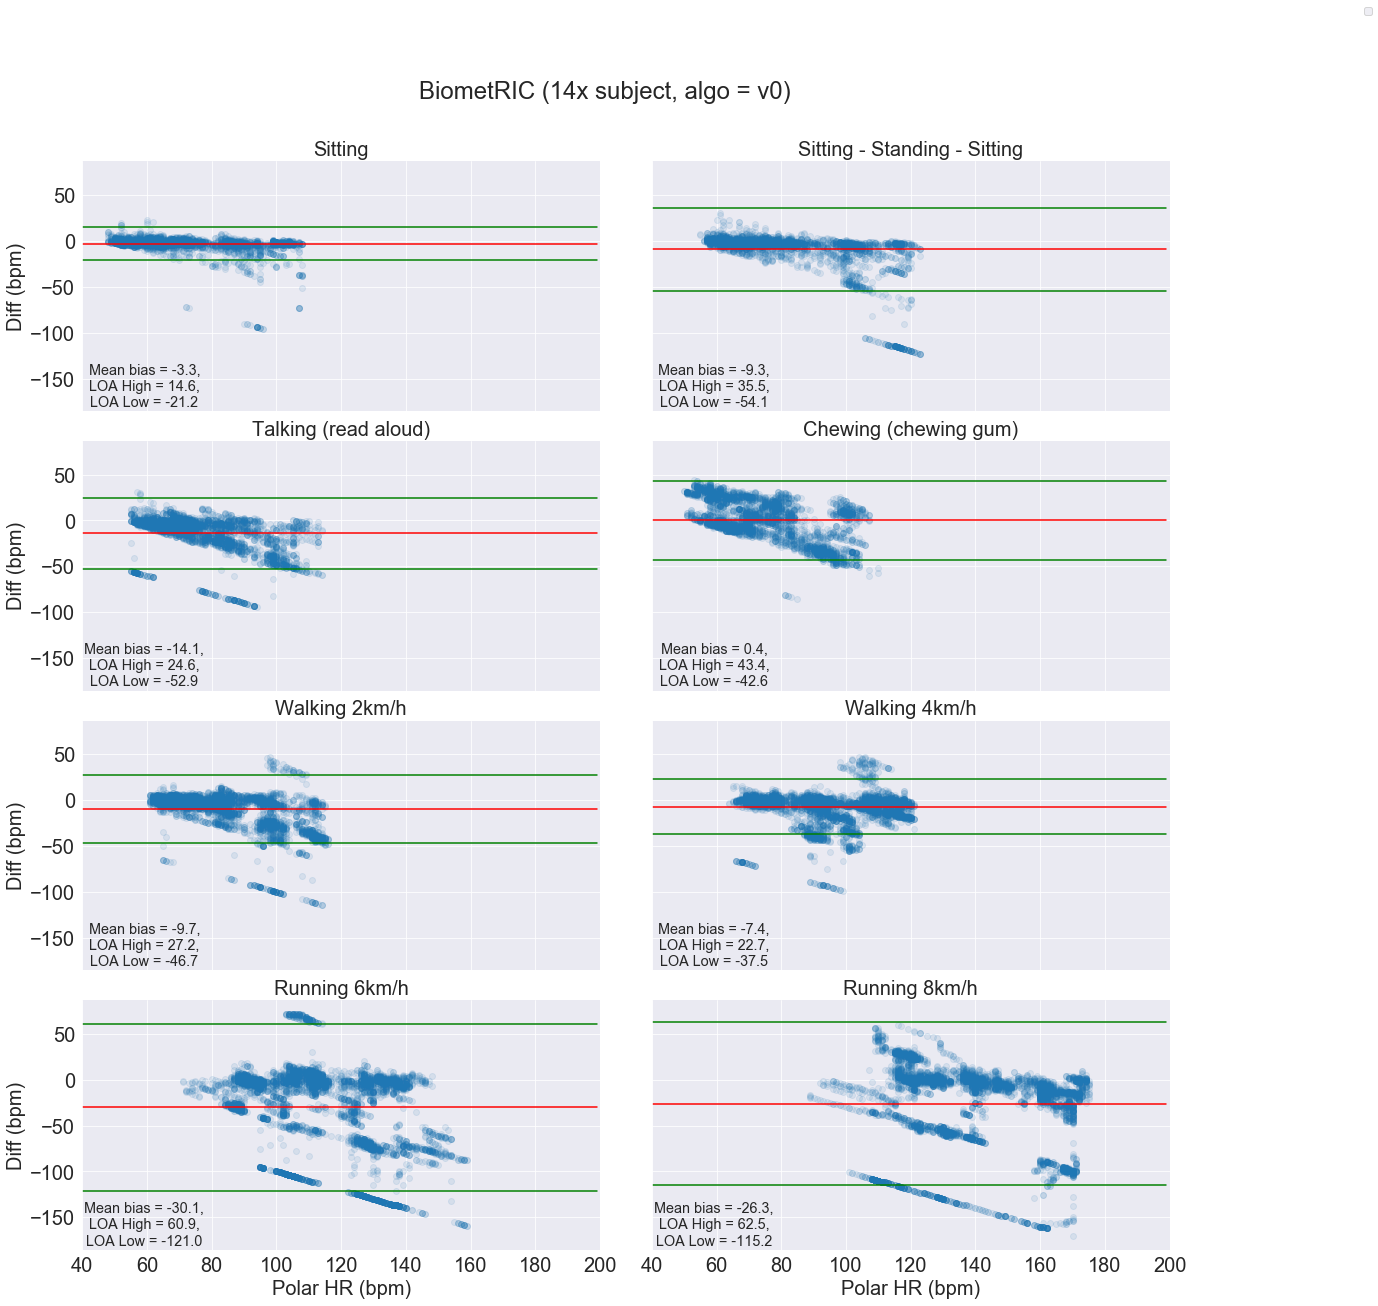

In [ ]:
st.make_ba_plot( )